# Vehicle Detection and Tracking Project

### Import needed data

In [1]:
import os
import cv2
import math
import numpy as np
from random import randint
from skimage.feature import hog
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Define data set image paths for both positive and negative domains

In [2]:
Veh_Imgs_Path = "./../udacity_dataset/vehicles/vehicles/"
NonVeh_Imgs_Path = "./../udacity_dataset/non_vehicles/non_vehicles/"

Veh_Imgs = os.listdir(Veh_Imgs_Path)
NonVeh_Imgs = os.listdir(NonVeh_Imgs_Path)

### Collect Data set images

In [3]:
def CollectImages(folderpath, ImagePaths, isLabeled = True):
    images = []
    for ImagePath in ImagePaths:
        if (len(ImagePath.split('.')) == 2):
            im = cv2.imread(folderpath + ImagePath)
            im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
            #print('Image ' , ImagePath , ' is: ', type(im), ' with dimensions: ', im.shape)
            if isLabeled == True:
                images.append((im, ImagePath.split('.')[0]))
            else:
                images.append(im)
        else:
            print('Image', ImagePath, 'is correupted --> Discarded.')

    return images

In [4]:
CarImageSet = []
NonCarImageSet = []

for folder in Veh_Imgs:
    folderpath = Veh_Imgs_Path + folder
    Carsimagespath = os.listdir(folderpath)
    CarImageSet.append(CollectImages(folderpath + '/', Carsimagespath, True))

for folder in NonVeh_Imgs:
    folderpath = NonVeh_Imgs_Path + folder
    NonCarsimagespath = os.listdir(folderpath)
    NonCarImageSet.append(CollectImages(folderpath + '/', NonCarsimagespath, True))

CarImageSet = np.concatenate(CarImageSet)
NonCarImageSet = np.concatenate(NonCarImageSet)

print('Car Image Set has ', str(len(CarImageSet)))
print('Non Car Image Set has ', str(len(NonCarImageSet)))

Car Image Set has  8792
Non Car Image Set has  8968


### Define to access both image pixel values and labels

In [5]:
imgPxlVal = 0
img_Label = 1

## Visualize DataSet

In [6]:
def pltImages(images, labels, nrows = 1, ncols = 2, fig_w = 20, fig_h = 10, isgray = False):
    #below code is inspired from https://stackoverflow.com/questions/17111525/how-to-show-multiple-images-in-one-figure
    assert len(images) == len(labels)
    assert len(images) <= (nrows * ncols)
    
    fig = plt.figure(figsize=(fig_w, fig_h))
    
    for index in range(len(images)):
        plot = fig.add_subplot(nrows,ncols,index+1)
        plot.set_title(labels[index])
        if(isgray == False):
            plt.imshow(images[index].squeeze())
        else:
            plt.imshow(images[index].squeeze(), cmap='gray')
    
    plt.tight_layout()
    plt.show()

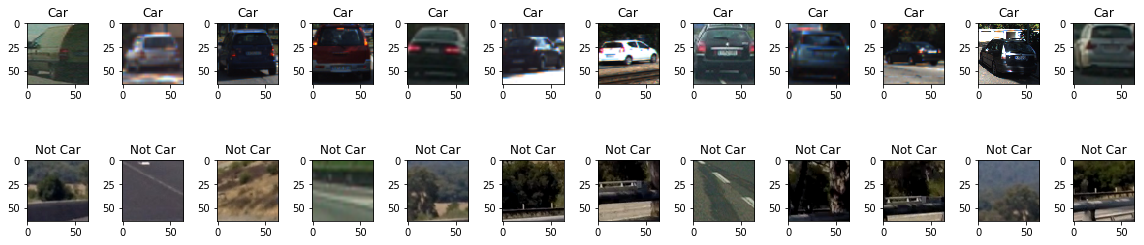

In [7]:
vis_imgs = []
vis_labels = []

#show 12 random images from Car dataset
for i in range(12):
    index = randint(0, len(CarImageSet))
    vis_imgs.append(CarImageSet[index][imgPxlVal])
    vis_labels.append('Car')

#show 12 random images from Not Car dataset
for i in range(12):
    index = randint(0, len(NonCarImageSet))
    vis_imgs.append(NonCarImageSet[index][imgPxlVal])
    vis_labels.append('Not Car')

pltImages(vis_imgs, vis_labels, 2, 12, 16, 4)

### Visualize color space features using histograms

In [8]:
def pltHistograms(hists, labels, nrows = 1, ncols = 2, fig_w = 20, fig_h = 10, xlim = [0,256]):
    assert len(hists) == len(labels)
    assert len(hists) <= (nrows * ncols)
    
    fig = plt.figure(figsize=(fig_w, fig_h))
    
    for index in range(len(hists)):
        plot = fig.add_subplot(nrows,ncols,index+1)
        plot.set_title(labels[index])
        plt.plot(hists[index])
        plt.xlim(xlim)
    
    plt.tight_layout()
    plt.show()

In [9]:
Channel_0 = 0
Channel_1 = 1
Channel_2 = 2

histSize = [48]
histrange = [0,255]

ColorSpace = ['RGB','HSV','HLS', 'LAB', 'YUV', 'LUV', 'YCrCb']

In [10]:
def ExploreColorSpaceHistogram(img):
    hist = []
    hist_label = []

    hist_0 = cv2.calcHist(img,[Channel_0],None,histSize,histrange)
    hist_1 = cv2.calcHist(img,[Channel_1],None,histSize,histrange)
    hist_2 = cv2.calcHist(img,[Channel_2],None,histSize,histrange)
    hist.append(hist_0)
    hist_label.append("RGB_Channel 0")
    hist.append(hist_1)
    hist_label.append("RGB_Channel 1")
    hist.append(hist_2)
    hist_label.append("RGB_Channel 2")

    HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    hist_0 = cv2.calcHist(HSV,[Channel_0],None,histSize,histrange)
    hist_1 = cv2.calcHist(HSV,[Channel_1],None,histSize,histrange)
    hist_2 = cv2.calcHist(HSV,[Channel_2],None,histSize,histrange)
    hist.append(hist_0)
    hist_label.append("HSV_Channel 0")
    hist.append(hist_1)
    hist_label.append("HSV_Channel 1")
    hist.append(hist_2)
    hist_label.append("HSV_Channel 2")

    HLS = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

    hist_0 = cv2.calcHist(HLS,[Channel_0],None,histSize,histrange)
    hist_1 = cv2.calcHist(HLS,[Channel_1],None,histSize,histrange)
    hist_2 = cv2.calcHist(HLS,[Channel_2],None,histSize,histrange)
    hist.append(hist_0)
    hist_label.append("HLS_Channel 0")
    hist.append(hist_1)
    hist_label.append("HLS_Channel 1")
    hist.append(hist_2)
    hist_label.append("HLS_Channel 2")

    LAB = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

    hist_0 = cv2.calcHist(LAB,[Channel_0],None,histSize,histrange)
    hist_1 = cv2.calcHist(LAB,[Channel_1],None,histSize,histrange)
    hist_2 = cv2.calcHist(LAB,[Channel_2],None,histSize,histrange)
    hist.append(hist_0)
    hist_label.append("LAB_Channel 0")
    hist.append(hist_1)
    hist_label.append("LAB_Channel 1")
    hist.append(hist_2)
    hist_label.append("LAB_Channel 2")

    YUV = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

    hist_0 = cv2.calcHist(YUV,[Channel_0],None,histSize,histrange)
    hist_1 = cv2.calcHist(YUV,[Channel_1],None,histSize,histrange)
    hist_2 = cv2.calcHist(YUV,[Channel_2],None,histSize,histrange)
    hist.append(hist_0)
    hist_label.append("YUV_Channel 0")
    hist.append(hist_1)
    hist_label.append("YUV_Channel 1")
    hist.append(hist_2)
    hist_label.append("YUV_Channel 2")

    LUV = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

    hist_0 = cv2.calcHist(LUV,[Channel_0],None,histSize,histrange)
    hist_1 = cv2.calcHist(LUV,[Channel_1],None,histSize,histrange)
    hist_2 = cv2.calcHist(LUV,[Channel_2],None,histSize,histrange)
    hist.append(hist_0)
    hist_label.append("LUV_Channel 0")
    hist.append(hist_1)
    hist_label.append("LUV_Channel 1")
    hist.append(hist_2)
    hist_label.append("LUV_Channel 2")
    
    YCrCb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

    hist_0 = cv2.calcHist(YCrCb,[Channel_0],None,histSize,histrange)
    hist_1 = cv2.calcHist(YCrCb,[Channel_1],None,histSize,histrange)
    hist_2 = cv2.calcHist(YCrCb,[Channel_2],None,histSize,histrange)
    hist.append(hist_0)
    hist_label.append("YCrCb_Channel 0")
    hist.append(hist_1)
    hist_label.append("YCrCb_Channel 1")
    hist.append(hist_2)
    hist_label.append("YCrCb_Channel 2")

    pltHistograms(hist, hist_label, 7, 3, xlim = [0, histSize[0]-1])

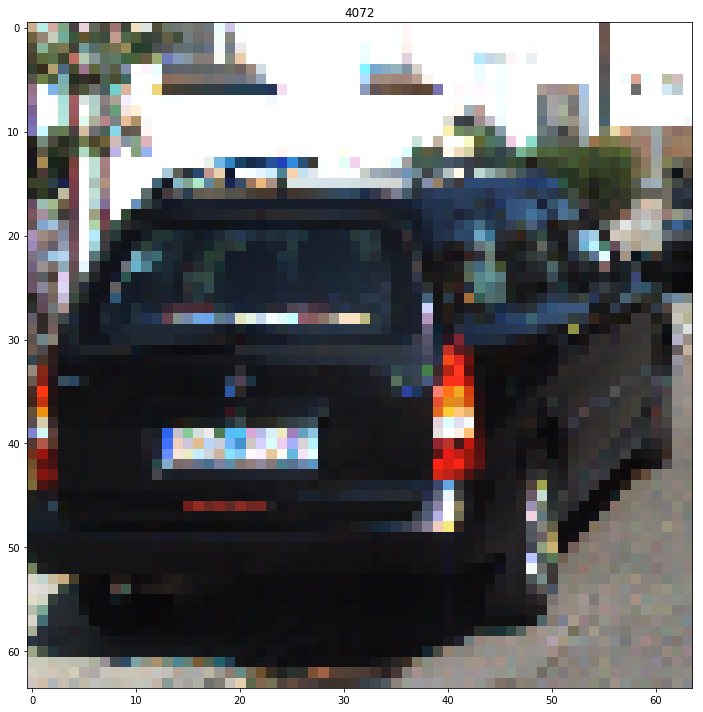

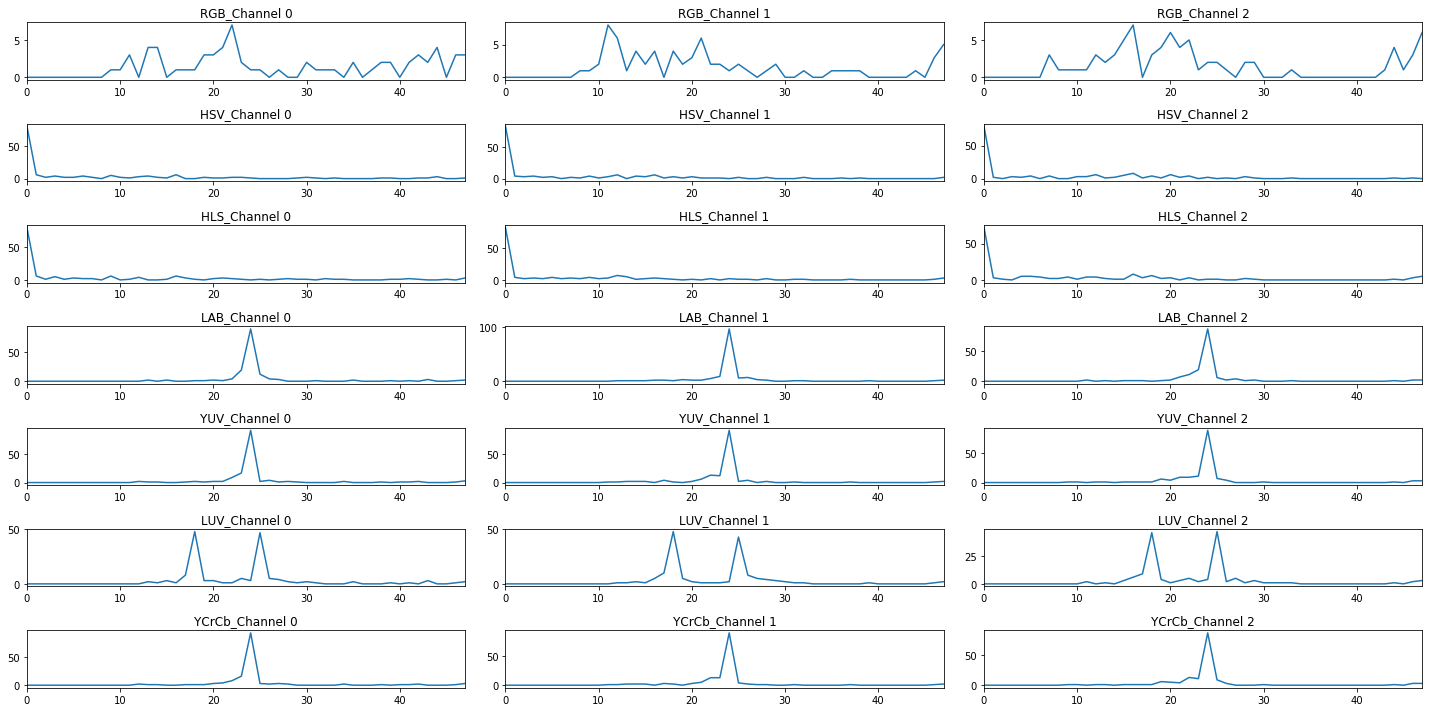

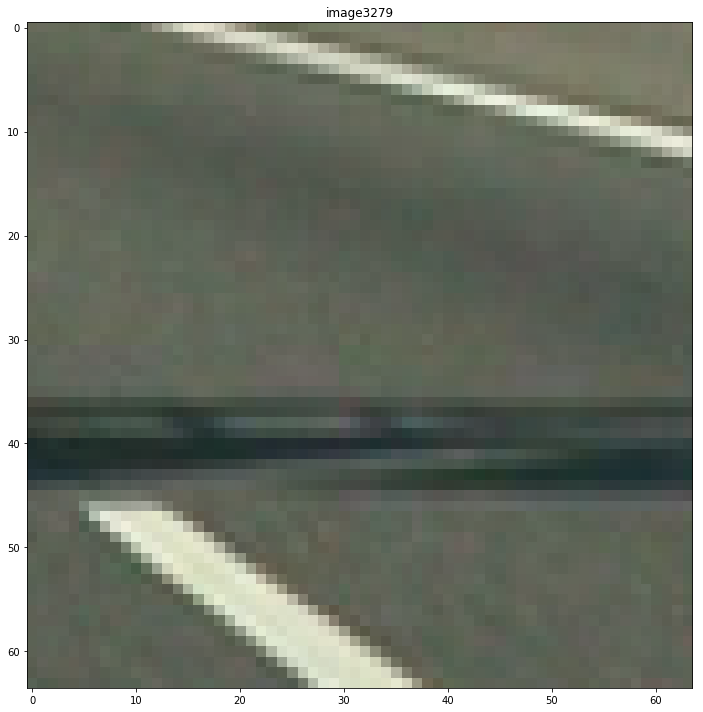

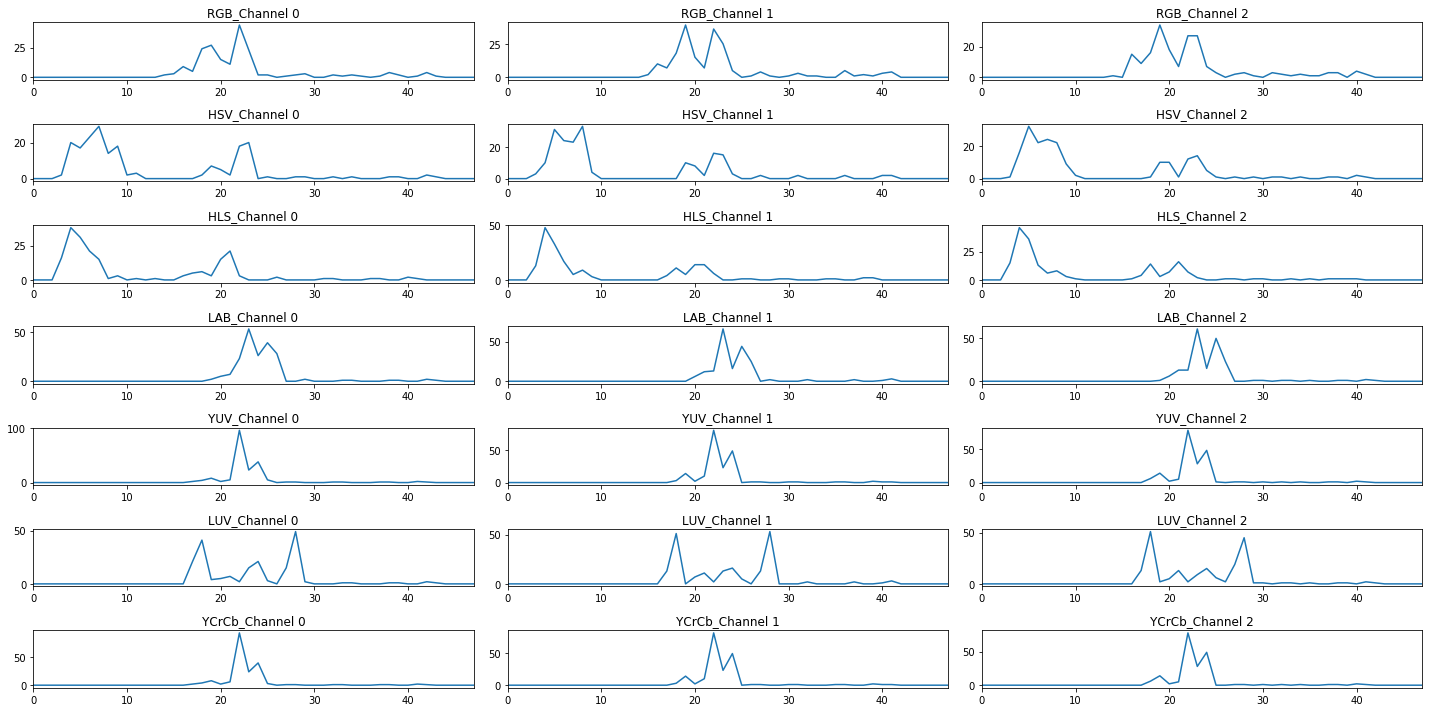

In [11]:
#CarImageIndex = 0
CarImageIndex = randint(0, len(CarImageSet))
CarImage = [CarImageSet[CarImageIndex][imgPxlVal]]
CarImageLabel = [CarImageSet[CarImageIndex][img_Label]]

pltImages(CarImage, CarImageLabel, 1, 1)
ExploreColorSpaceHistogram(CarImage[0])

#NonCarImageIndex = 0
NonCarImageIndex = randint(0, len(NonCarImageSet))
NonCarImage = [NonCarImageSet[NonCarImageIndex][imgPxlVal]]
NonCarImageLabel = [NonCarImageSet[NonCarImageIndex][img_Label]]

pltImages(NonCarImage, NonCarImageLabel, 1, 1)
ExploreColorSpaceHistogram(NonCarImage[0])

Spatial Binning

In [12]:
#Code obtained from Udacity lesson 16
def bin_spatial_Demo_colorspace(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'LAB':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    # Return the feature vector
    return features

In [13]:
size=(32, 32)

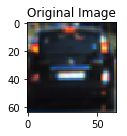

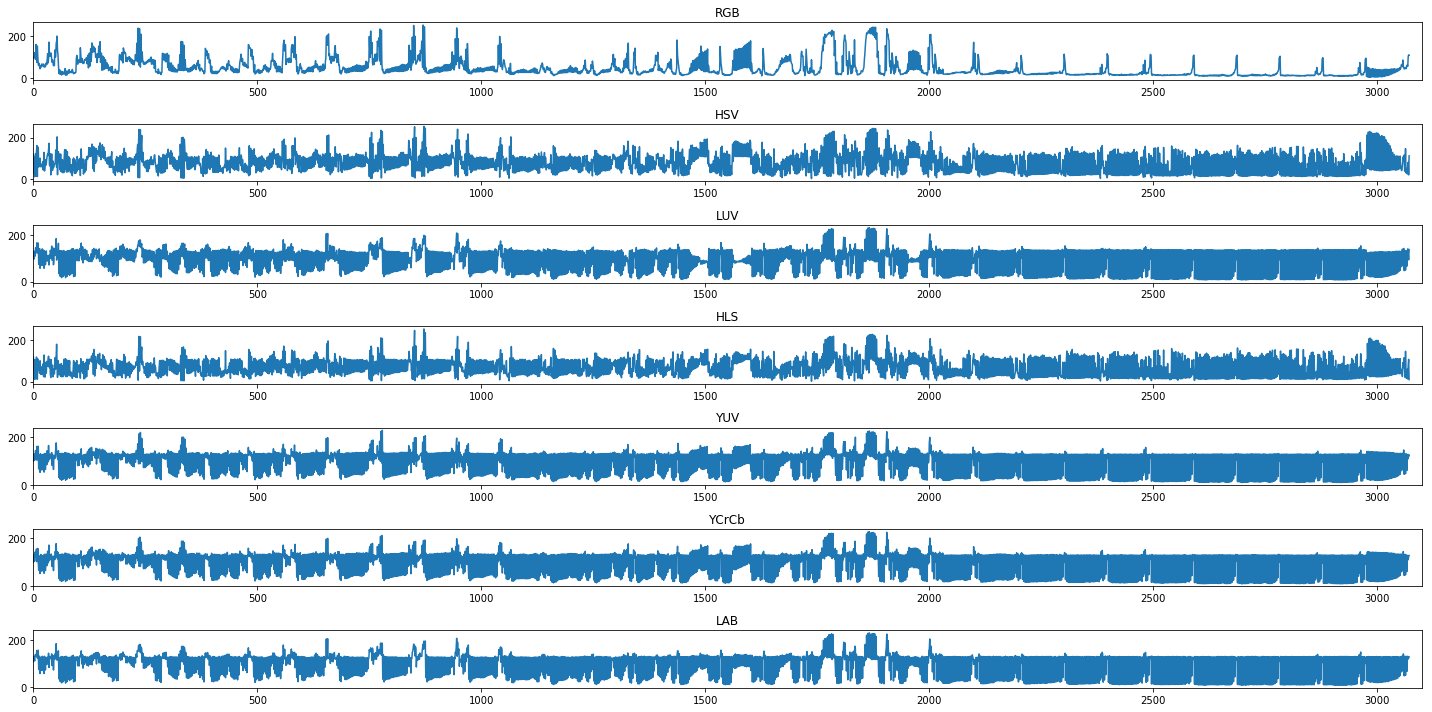

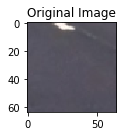

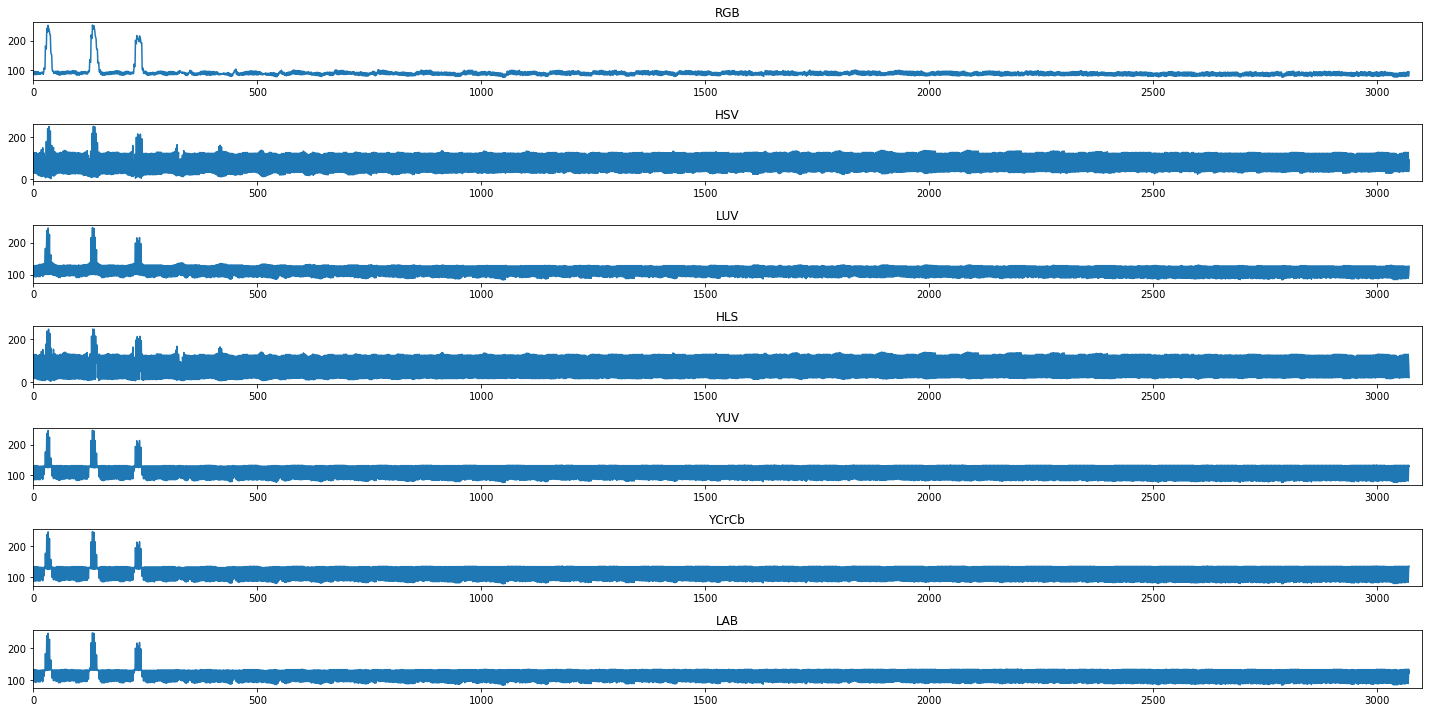

In [14]:
vis_imgs = []
vis_labels = []

index = randint(0, len(CarImageSet))

vis_imgs.append(bin_spatial_Demo_colorspace(CarImageSet[index][imgPxlVal], size=size))
vis_labels.append('RGB')
vis_imgs.append(bin_spatial_Demo_colorspace(CarImageSet[index][imgPxlVal], color_space='HSV', size=size))
vis_labels.append('HSV')
vis_imgs.append(bin_spatial_Demo_colorspace(CarImageSet[index][imgPxlVal], color_space='LUV', size=size))
vis_labels.append('LUV')
vis_imgs.append(bin_spatial_Demo_colorspace(CarImageSet[index][imgPxlVal], color_space='HLS', size=size))
vis_labels.append('HLS')
vis_imgs.append(bin_spatial_Demo_colorspace(CarImageSet[index][imgPxlVal], color_space='YUV', size=size))
vis_labels.append('YUV')
vis_imgs.append(bin_spatial_Demo_colorspace(CarImageSet[index][imgPxlVal], color_space='YCrCb', size=size))
vis_labels.append('YCrCb')
vis_imgs.append(bin_spatial_Demo_colorspace(CarImageSet[index][imgPxlVal], color_space='LAB', size=size))
vis_labels.append('LAB')

pltImages([CarImageSet[index][imgPxlVal]], ["Original Image"], 1, 1, 20, 2)
pltHistograms(vis_imgs, vis_labels, 7, 1, xlim = [0, 3100])

vis_imgs = []
vis_labels = []

index = randint(0, len(NonCarImageSet))

vis_imgs.append(bin_spatial_Demo_colorspace(NonCarImageSet[index][imgPxlVal], size=size))
vis_labels.append('RGB')
vis_imgs.append(bin_spatial_Demo_colorspace(NonCarImageSet[index][imgPxlVal], color_space='HSV', size=size))
vis_labels.append('HSV')
vis_imgs.append(bin_spatial_Demo_colorspace(NonCarImageSet[index][imgPxlVal], color_space='LUV', size=size))
vis_labels.append('LUV')
vis_imgs.append(bin_spatial_Demo_colorspace(NonCarImageSet[index][imgPxlVal], color_space='HLS', size=size))
vis_labels.append('HLS')
vis_imgs.append(bin_spatial_Demo_colorspace(NonCarImageSet[index][imgPxlVal], color_space='YUV', size=size))
vis_labels.append('YUV')
vis_imgs.append(bin_spatial_Demo_colorspace(NonCarImageSet[index][imgPxlVal], color_space='YCrCb', size=size))
vis_labels.append('YCrCb')
vis_imgs.append(bin_spatial_Demo_colorspace(NonCarImageSet[index][imgPxlVal], color_space='LAB', size=size))
vis_labels.append('LAB')

pltImages([NonCarImageSet[index][imgPxlVal]], ["Original Image"], 1, 1, 20, 2)
pltHistograms(vis_imgs, vis_labels, 7, 1, xlim = [0, 3100])

### Visualize HOG features

In [38]:
def get_hog_features_demo(img, orient, pix_per_cell, cell_per_block, blockNorm, visualize=False, feature_vec=True):
    if visualize == True:
        features, hog_im = hog(img,
                               orientations=orient,
                               pixels_per_cell=(pix_per_cell, pix_per_cell),
                               cells_per_block=(cell_per_block, cell_per_block),
                               block_norm = blockNorm, #Block Normalize didn't show any change effect on image
                               transform_sqrt=False, 
                               visualise=visualize,
                               feature_vector=feature_vec)
        print(features)
        print(hog_im)
        return features, hog_im
    else:      
        features = hog(img,
                       orientations=orient,
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block),
                       block_norm = blockNorm, #Block Normalize didn't show any change effect on image
                       transform_sqrt=False, 
                       visualise=False,
                       feature_vector=feature_vec)
        print("Here")
        return features

In [39]:
orient = 8
pix_per_cell = 16
cells_per_block = 2
TransformSqrt = True

blockNorm = ['L1', 'L1-sqrt', 'L2', 'L2-Hys']

hc = 'ALL'

In [40]:
def VisauliseHOG(img):
    vis = True
    __, hog_im = get_hog_features_demo(
        img,
        orient,
        pix_per_cell,
        cells_per_block,
        'L2-Hys',
        visualize=vis,
        #trns_sqrt=TransformSqrt,
        feature_vec=False)
    return hog_im

In [41]:
def ExploreHOGSpace(img):
    HOG_IMs = []
    hog_label = []
    
    hog_0 = VisauliseHOG(img[:,:,Channel_0])
    hog_1 = VisauliseHOG(img[:,:,Channel_1])
    hog_2 = VisauliseHOG(img[:,:,Channel_2])
    pltImages([hog_0], ["RGB_Channel 0"], 1, 1)
    pltImages([hog_1], ["RGB_Channel 1"], 1, 1)
    pltImages([hog_2], ["RGB_Channel 2"], 1, 1)

    HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    hog_0 = VisauliseHOG(HSV[:,:,Channel_0])
    hog_1 = VisauliseHOG(HSV[:,:,Channel_1])
    hog_2 = VisauliseHOG(HSV[:,:,Channel_2])
    pltImages([hog_0], ["HSV_Channel 0"], 1, 1)
    pltImages([hog_1], ["HSV_Channel 1"], 1, 1)
    pltImages([hog_2], ["HSV_Channel 2"], 1, 1)

    HLS = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

    hog_0 = VisauliseHOG(HLS[:,:,Channel_0])
    hog_1 = VisauliseHOG(HLS[:,:,Channel_1])
    hog_2 = VisauliseHOG(HLS[:,:,Channel_2])
    pltImages([hog_0], ["HLS_Channel 0"], 1, 1)
    pltImages([hog_1], ["HLS_Channel 1"], 1, 1)
    pltImages([hog_2], ["HLS_Channel 2"], 1, 1)

    LAB = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

    hog_0 = VisauliseHOG(LAB[:,:,Channel_0])
    hog_1 = VisauliseHOG(LAB[:,:,Channel_1])
    hog_2 = VisauliseHOG(LAB[:,:,Channel_2])
    pltImages([hog_0], ["LAB_Channel 0"], 1, 1)
    pltImages([hog_1], ["LAB_Channel 1"], 1, 1)
    pltImages([hog_2], ["LAB_Channel 2"], 1, 1)

    YUV = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

    hog_0 = VisauliseHOG(YUV[:,:,Channel_0])
    hog_1 = VisauliseHOG(YUV[:,:,Channel_1])
    hog_2 = VisauliseHOG(YUV[:,:,Channel_2])
    pltImages([hog_0], ["YUV_Channel 0"], 1, 1)
    pltImages([hog_1], ["YUV_Channel 1"], 1, 1)
    pltImages([hog_2], ["YUV_Channel 2"], 1, 1)

    LUV = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

    hog_0 = VisauliseHOG(LUV[:,:,Channel_0])
    hog_1 = VisauliseHOG(LUV[:,:,Channel_1])
    hog_2 = VisauliseHOG(LUV[:,:,Channel_2])
    pltImages([hog_0], ["LUV_Channel 0"], 1, 1)
    pltImages([hog_1], ["LUV_Channel 1"], 1, 1)
    pltImages([hog_2], ["LUV_Channel 2"], 1, 1)
    
    YCrCb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

    hog_0 = VisauliseHOG(YCrCb[:,:,Channel_0])
    hog_1 = VisauliseHOG(YCrCb[:,:,Channel_1])
    hog_2 = VisauliseHOG(YCrCb[:,:,Channel_2])
    pltImages([hog_0], ["YCrCb_Channel 0"], 1, 1)
    pltImages([hog_1], ["YCrCb_Channel 1"], 1, 1)
    pltImages([hog_2], ["YCrCb_Channel 2"], 1, 1)

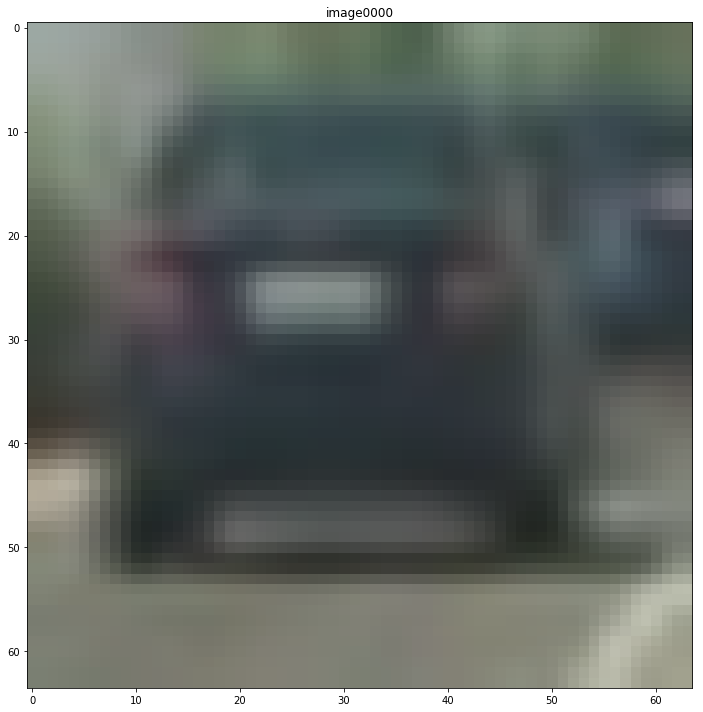

[[[[[ 0.02688649  0.02987137  0.010339    0.00328564  0.00864183  0.0114068
      0.00672705  0.00510655]
    [ 0.00658857  0.00935853  0.0197827   0.02987137  0.02161531
      0.00247094  0.005554    0.0013251 ]]

   [[ 0.01460944  0.00968006  0.0117881   0.00877693  0.0153614   0.02923453
      0.02987137  0.01180276]
    [ 0.00936499  0.00672306  0.02430268  0.02987137  0.02987137
      0.00983487  0.00809923  0.01065592]]]


  [[[ 0.00713202  0.01013045  0.02141444  0.0310789   0.02339821
      0.00267475  0.00601211  0.0014344 ]
    [ 0.01650873  0.0083052   0.01460851  0.01796244  0.02808905
      0.01912373  0.01137569  0.0121713 ]]

   [[ 0.01013744  0.0072776   0.02630724  0.0310789   0.0310789   0.01064608
      0.00876728  0.01153486]
    [ 0.02004452  0.01292407  0.01735504  0.02605665  0.02250528
      0.01241578  0.01593878  0.02170614]]]


  [[[ 0.03548014  0.01784932  0.03139622  0.0386044   0.04556186
      0.04110021  0.02444834  0.02615824]
    [ 0.01470599  0.011269

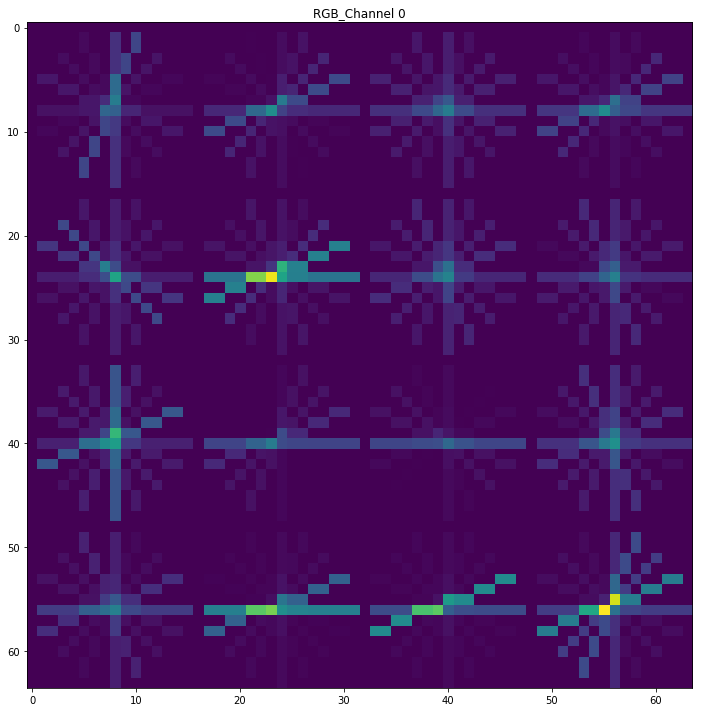

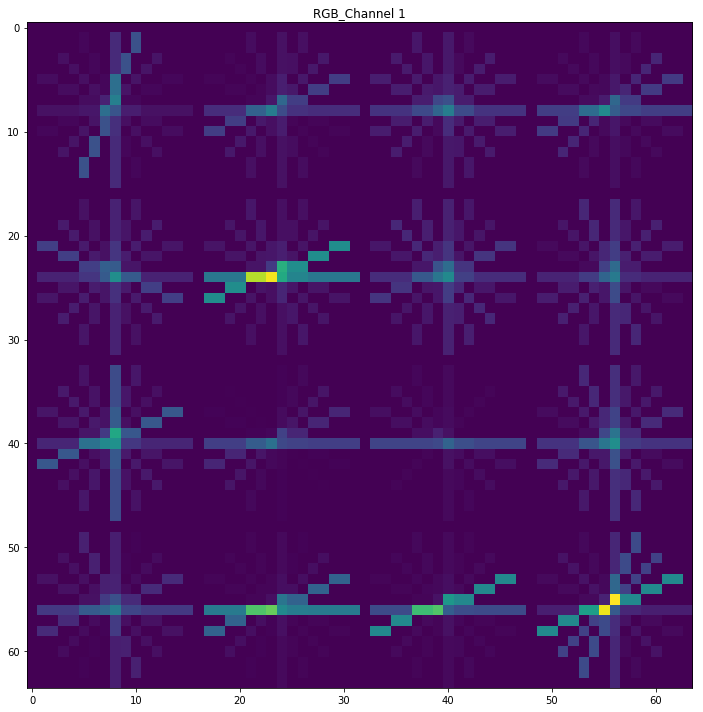

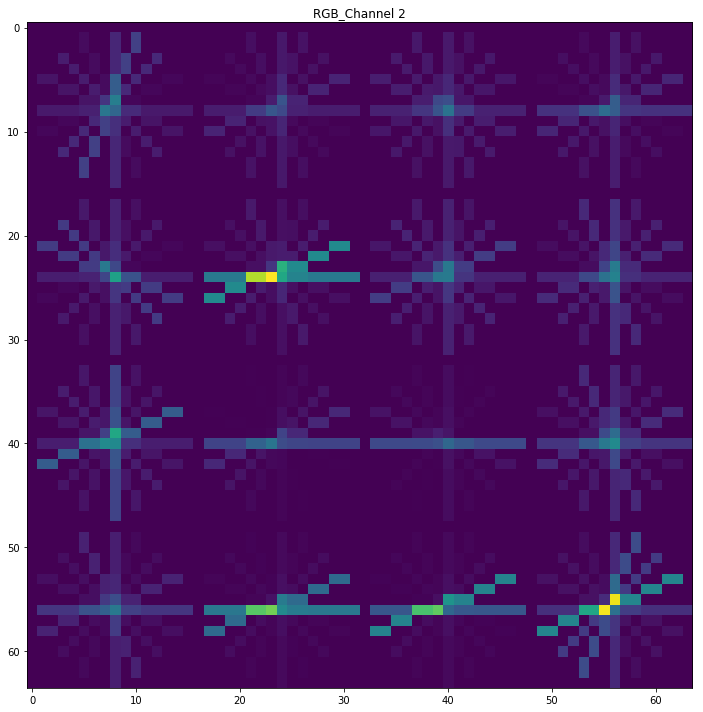

[[[[[ 0.0140113   0.00944915  0.00425965  0.0070209   0.01623388
      0.00331782  0.00817682  0.00418667]
    [ 0.00151582  0.00172552  0.00466469  0.02294776  0.02774621
      0.00124657  0.00102563  0.        ]]

   [[ 0.02774621  0.02774621  0.02774621  0.02116558  0.01772018
      0.01768653  0.01211827  0.02774621]
    [ 0.00772069  0.00361186  0.00760284  0.00732083  0.01625717
      0.00207376  0.01186274  0.022243  ]]]


  [[[ 0.00191453  0.00217939  0.00589167  0.02898381  0.03118253
      0.00157446  0.00129541  0.        ]
    [ 0.00594693  0.00115332  0.00496599  0.01291387  0.03118253
      0.00361712  0.00258204  0.        ]]

   [[ 0.0097515   0.00456191  0.00960265  0.00924647  0.02053337
      0.00261924  0.01498305  0.02809368]
    [ 0.03118253  0.03118253  0.03118253  0.01669699  0.03118253
      0.03118253  0.03118253  0.02481295]]]


  [[[ 0.00607616  0.00117838  0.00507391  0.0131945   0.03151952
      0.00369573  0.00263815  0.        ]
    [ 0.00591661  0.00282

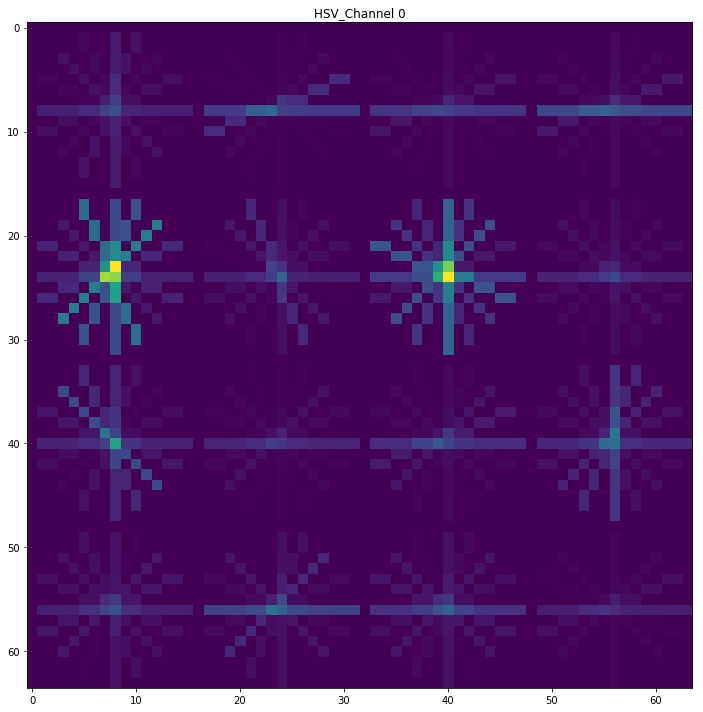

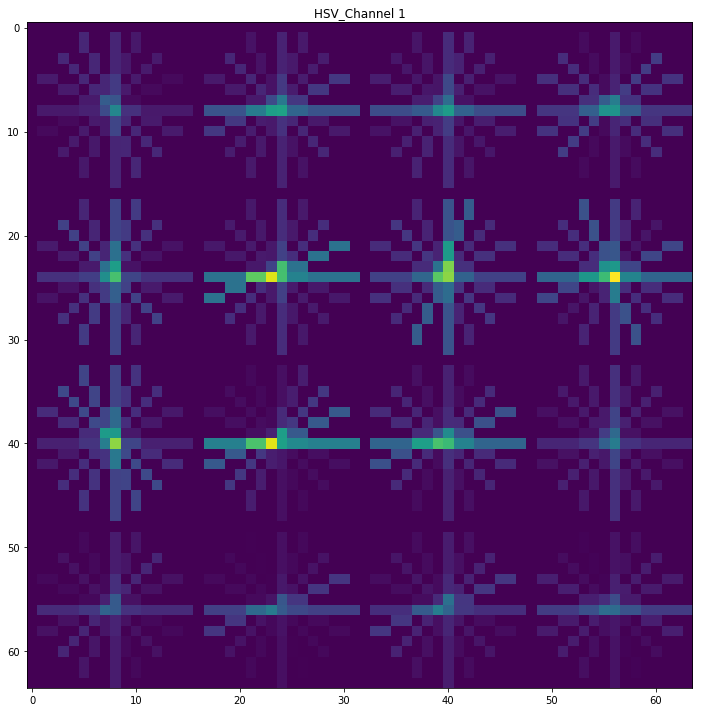

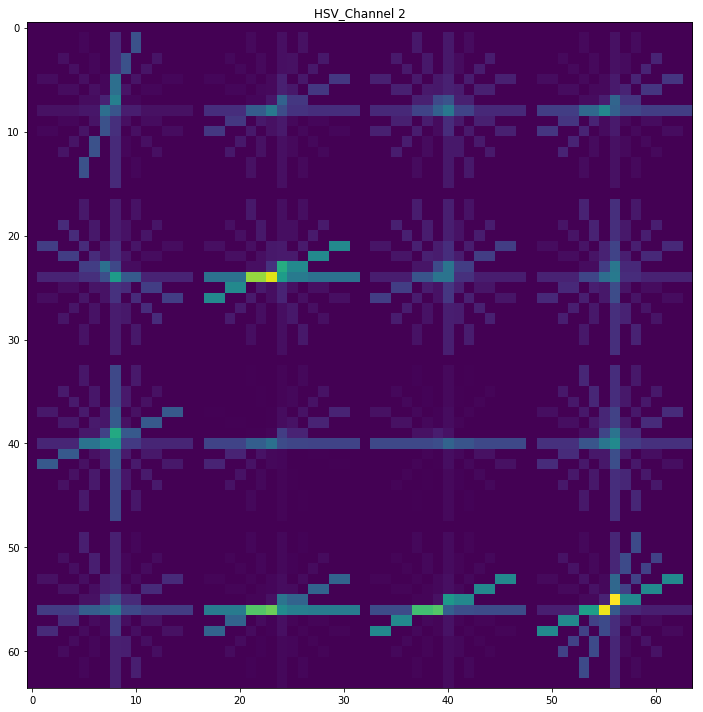

[[[[[ 0.01396076  0.00945101  0.00413826  0.00724354  0.01647054
      0.00363972  0.00797039  0.0043006 ]
    [ 0.00150798  0.0016207   0.00481655  0.02295902  0.02773027
      0.00124514  0.00102445  0.        ]]

   [[ 0.02773027  0.02773027  0.02773027  0.02114127  0.01784212
      0.01747093  0.0120822   0.02773027]
    [ 0.00794535  0.00343927  0.00744695  0.00755864  0.01633333
      0.00207138  0.01194517  0.02202975]]]


  [[[ 0.00190068  0.00204274  0.00607083  0.02893777  0.03113221
      0.00156938  0.00129123  0.        ]
    [ 0.00605219  0.00080556  0.0047767   0.01311301  0.03113221
      0.00402875  0.00247875  0.        ]]

   [[ 0.01001439  0.00433488  0.00938621  0.00952698  0.0205867   0.00261079
      0.01505581  0.02776651]
    [ 0.03113221  0.03113221  0.03113221  0.016532    0.03113221
      0.03113221  0.03113221  0.02441713]]]


  [[[ 0.00618432  0.00082315  0.00488098  0.01339928  0.0314702   0.0041167
      0.00253287  0.        ]
    [ 0.00599482  0.002820

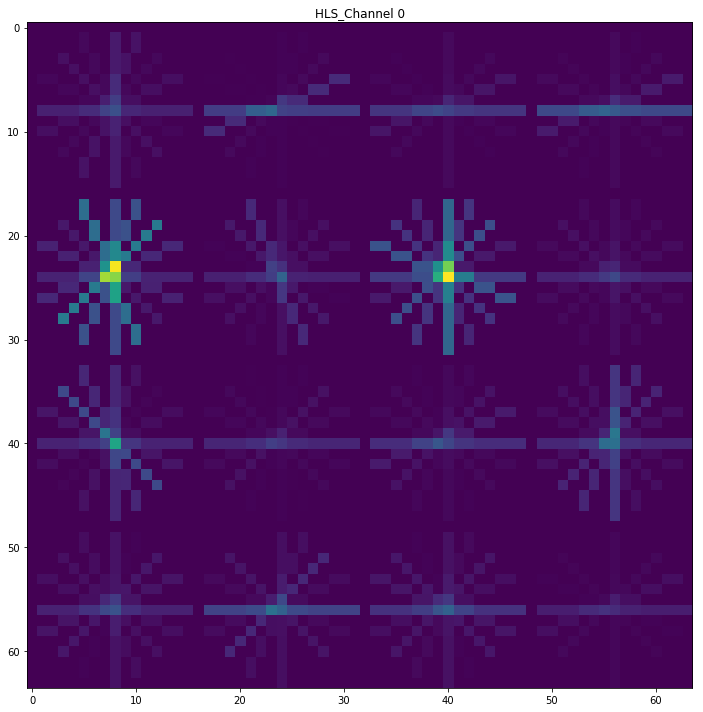

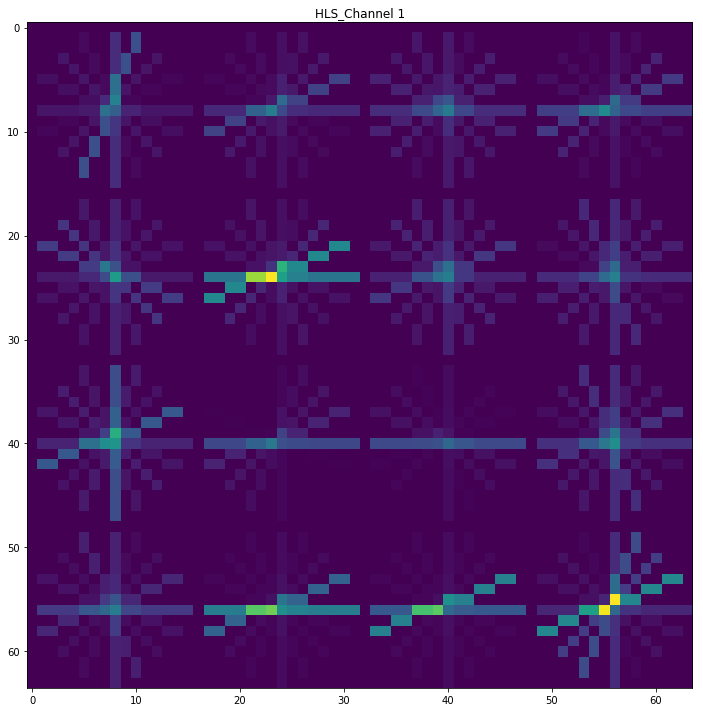

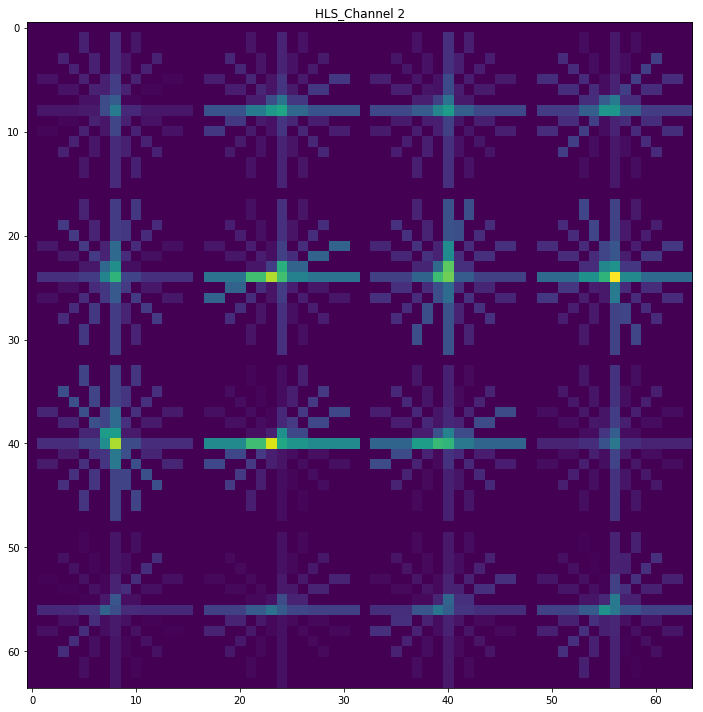

[[[[[ 0.01849234  0.02779487  0.00819117  0.00294237  0.00727147
      0.00620927  0.00763099  0.00347012]
    [ 0.00812863  0.00713964  0.01154557  0.02779487  0.02332972
      0.00271751  0.00221363  0.00431178]]

   [[ 0.01476015  0.00999373  0.0130169   0.00826988  0.01675972
      0.02779487  0.02130966  0.00817566]
    [ 0.00786661  0.00547477  0.0130935   0.02779487  0.02779487
      0.00877118  0.01067902  0.00987495]]]


  [[[ 0.00836927  0.007351    0.01188736  0.02820328  0.02402036
      0.00279796  0.00227916  0.00443943]
    [ 0.01073055  0.00711627  0.01159338  0.01317175  0.02681914
      0.01379136  0.01249968  0.01142292]]

   [[ 0.00809949  0.00563684  0.01348111  0.02820328  0.02820328
      0.00903083  0.01099516  0.01016728]
    [ 0.0171378   0.01242927  0.00927727  0.02820328  0.0194541   0.01368311
      0.01849434  0.01603461]]]


  [[[ 0.02449664  0.01624565  0.02646638  0.03006962  0.04261298
      0.03148411  0.02853536  0.02607725]
    [ 0.01748511  0.01080

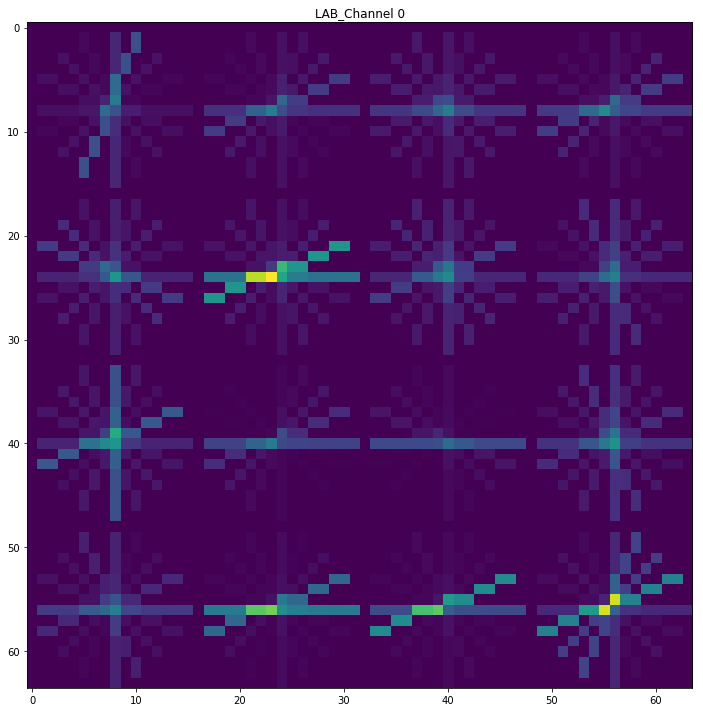

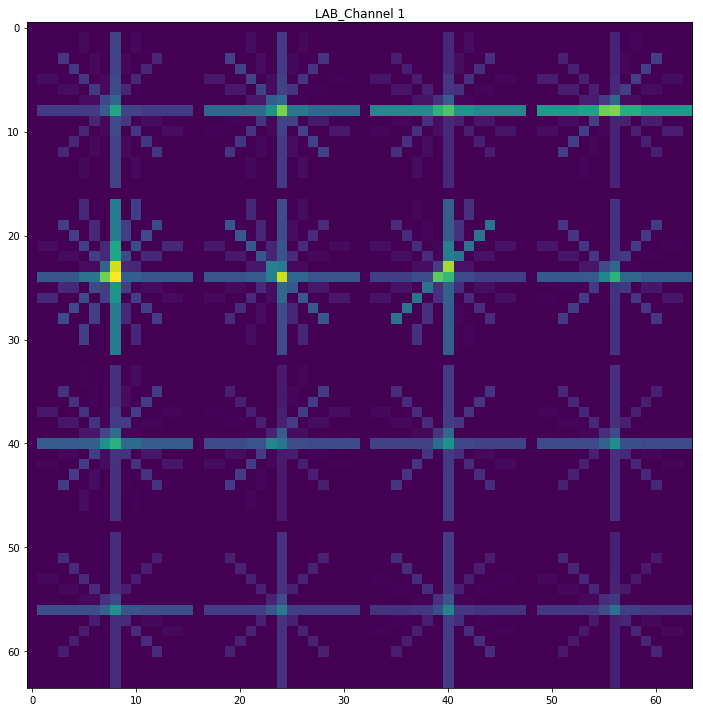

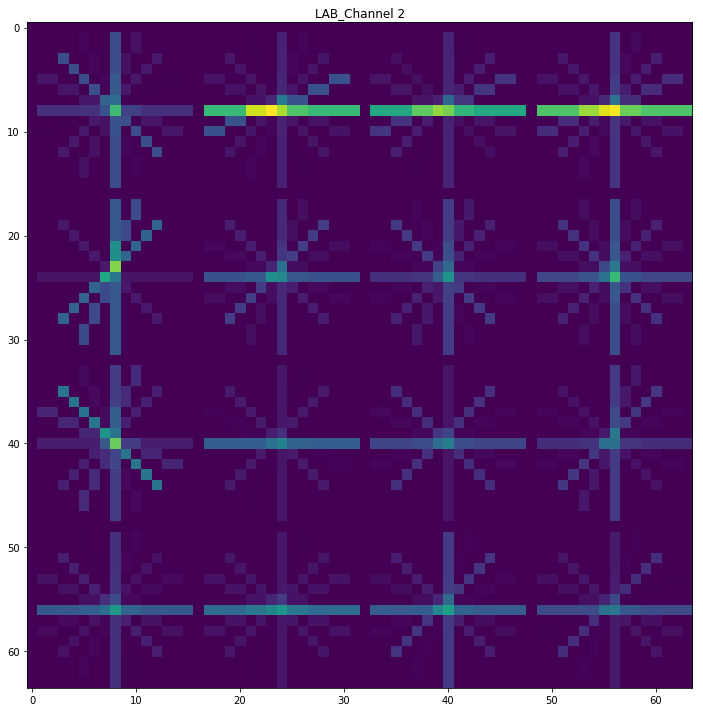

[[[[[ 0.019318    0.02961265  0.00887019  0.00303008  0.00943318
      0.00758703  0.0081819   0.00443826]
    [ 0.00956209  0.00855672  0.01284352  0.02961265  0.02066241
      0.00250471  0.00373293  0.00278694]]

   [[ 0.01494323  0.00963993  0.01407216  0.00804523  0.01684746
      0.02961265  0.02318297  0.01138366]
    [ 0.00812093  0.00632103  0.01523666  0.02961265  0.02961265
      0.00805156  0.00848863  0.01209721]]]


  [[[ 0.01016481  0.00909606  0.01365307  0.03053165  0.02196479
      0.00266258  0.00396822  0.00296261]
    [ 0.01386227  0.00693331  0.01484944  0.01351263  0.0269754   0.01797747
      0.01328305  0.01145219]]

   [[ 0.00863281  0.00671945  0.01619705  0.03053165  0.03053165
      0.00855906  0.00902368  0.01285971]
    [ 0.01810491  0.01228428  0.01197241  0.03053165  0.02064281
      0.01279397  0.02179141  0.01451831]]]


  [[[ 0.03168358  0.01584675  0.03393984  0.03088445  0.04615834
      0.04108927  0.03035971  0.02617511]
    [ 0.02231042  0.01084

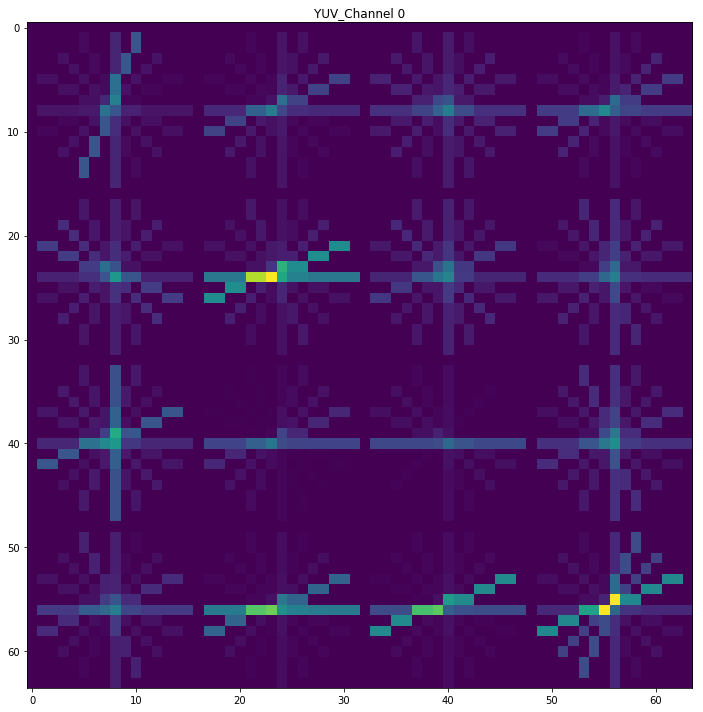

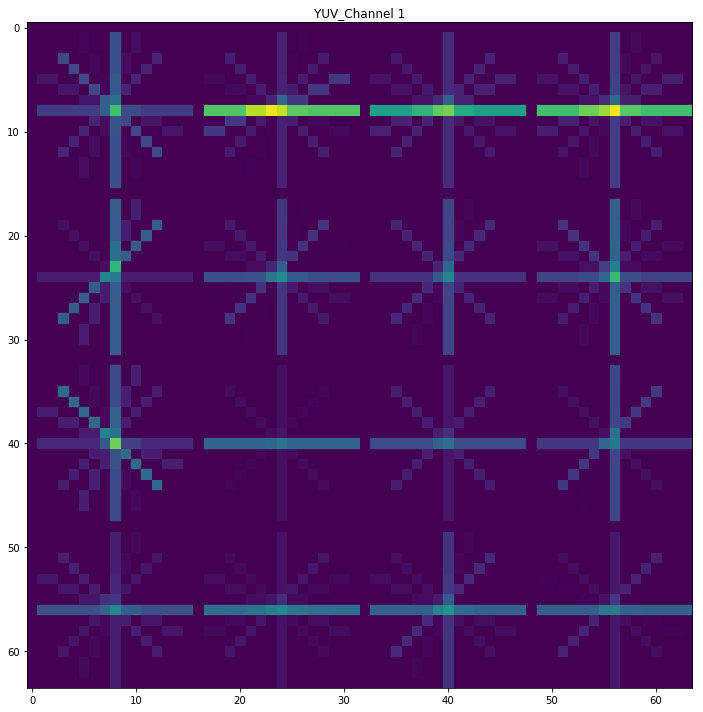

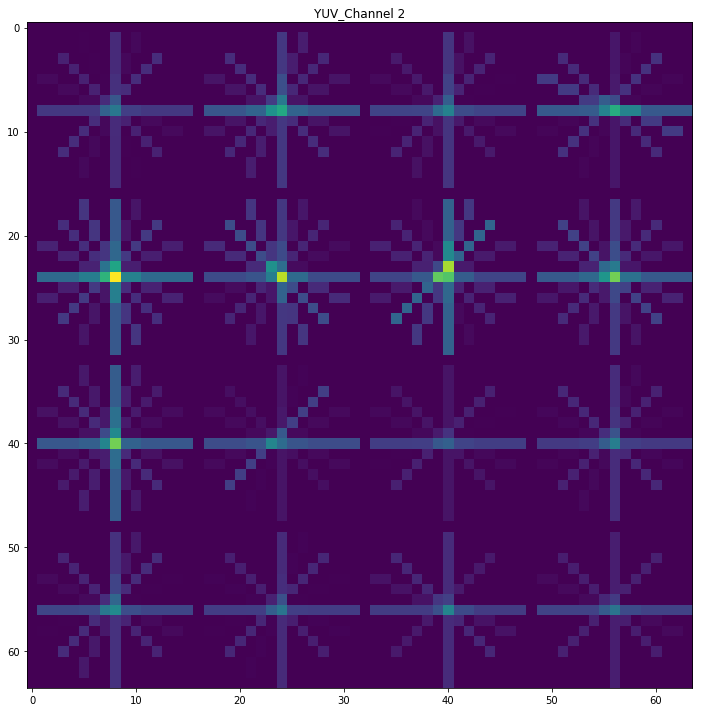

[[[[[ 0.01930722  0.0278399   0.00801094  0.00284517  0.00775578
      0.00678251  0.00691063  0.00360209]
    [ 0.0085314   0.0068384   0.01182669  0.0278399   0.02222687
      0.00266295  0.00230038  0.00401863]]

   [[ 0.01352819  0.01027598  0.01337079  0.00836516  0.01617102  0.0278399
      0.01984461  0.01035922]
    [ 0.00743235  0.00580624  0.01293653  0.0278399   0.0278399   0.00821117
      0.01004769  0.01066325]]]


  [[[ 0.00874698  0.0070112   0.01212553  0.02818944  0.02278851
      0.00273024  0.00235851  0.00412018]
    [ 0.01063607  0.00655918  0.01242899  0.01262699  0.02686638
      0.01431519  0.01184211  0.01155827]]

   [[ 0.00762016  0.00595296  0.01326342  0.02818944  0.02818944
      0.00841866  0.01030158  0.0109327 ]
    [ 0.01735882  0.01146062  0.01031075  0.02818944  0.01901278
      0.01473845  0.01933209  0.01475432]]]


  [[[ 0.0243934   0.01504322  0.0285054   0.02895952  0.04269059
      0.03283133  0.02715943  0.02650845]
    [ 0.01698859  0.010318

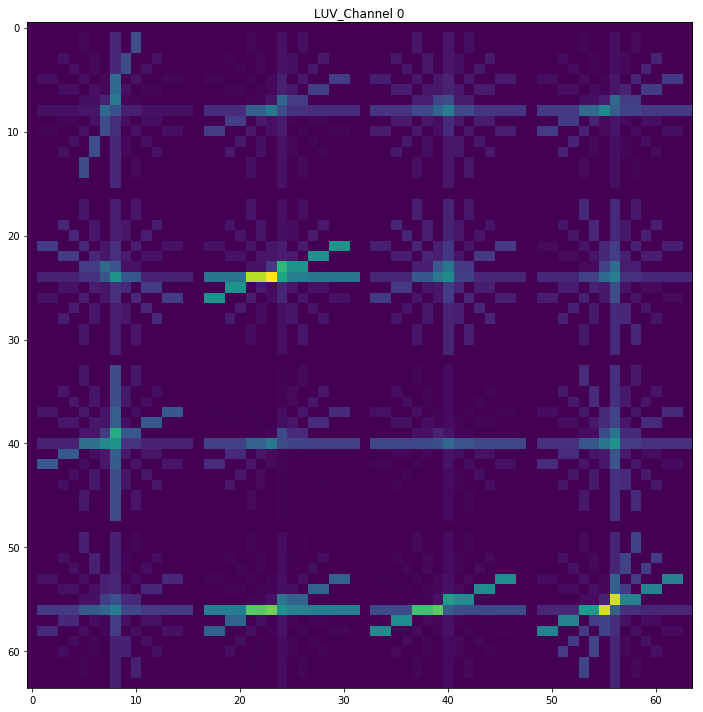

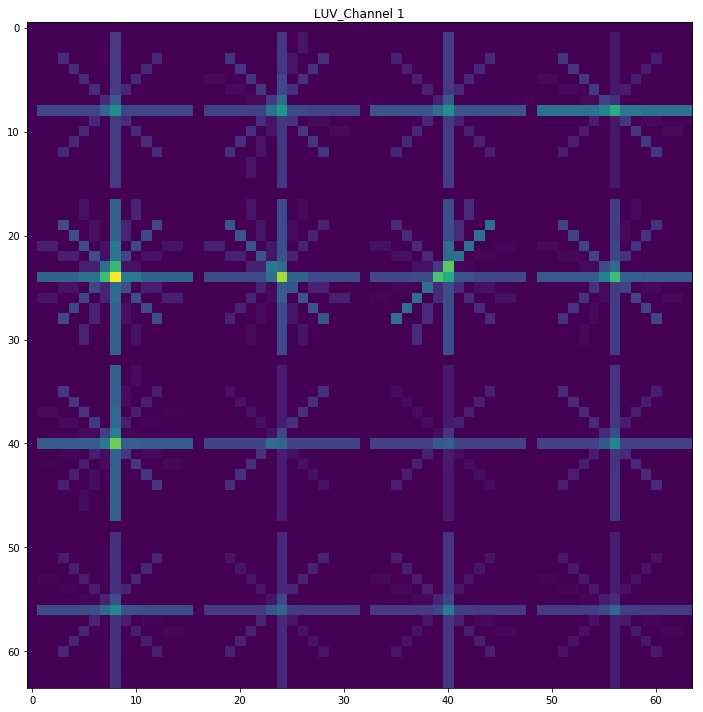

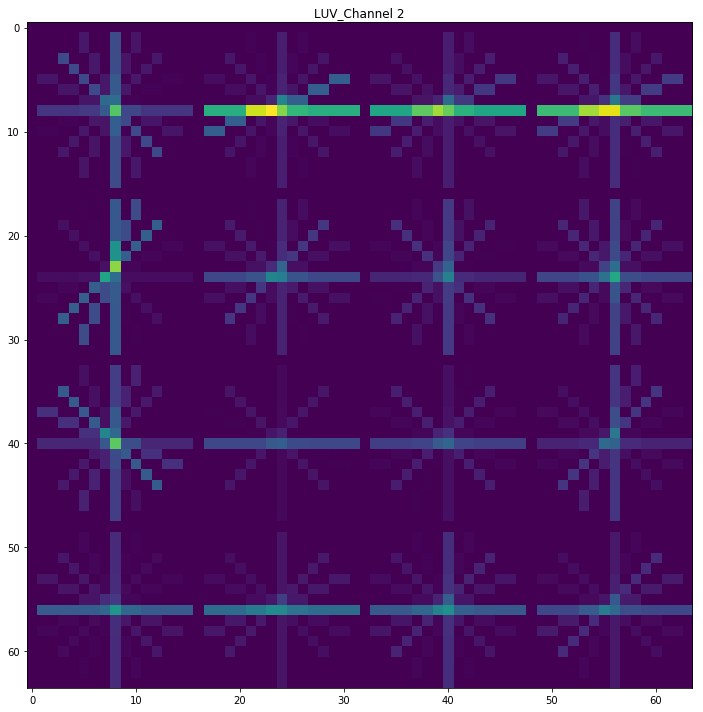

[[[[[ 0.019318    0.02961265  0.00887019  0.00303008  0.00943318
      0.00758703  0.0081819   0.00443826]
    [ 0.00956209  0.00855672  0.01284352  0.02961265  0.02066241
      0.00250471  0.00373293  0.00278694]]

   [[ 0.01494323  0.00963993  0.01407216  0.00804523  0.01684746
      0.02961265  0.02318297  0.01138366]
    [ 0.00812093  0.00632103  0.01523666  0.02961265  0.02961265
      0.00805156  0.00848863  0.01209721]]]


  [[[ 0.01016481  0.00909606  0.01365307  0.03053165  0.02196479
      0.00266258  0.00396822  0.00296261]
    [ 0.01386227  0.00693331  0.01484944  0.01351263  0.0269754   0.01797747
      0.01328305  0.01145219]]

   [[ 0.00863281  0.00671945  0.01619705  0.03053165  0.03053165
      0.00855906  0.00902368  0.01285971]
    [ 0.01810491  0.01228428  0.01197241  0.03053165  0.02064281
      0.01279397  0.02179141  0.01451831]]]


  [[[ 0.03168358  0.01584675  0.03393984  0.03088445  0.04615834
      0.04108927  0.03035971  0.02617511]
    [ 0.02231042  0.01084

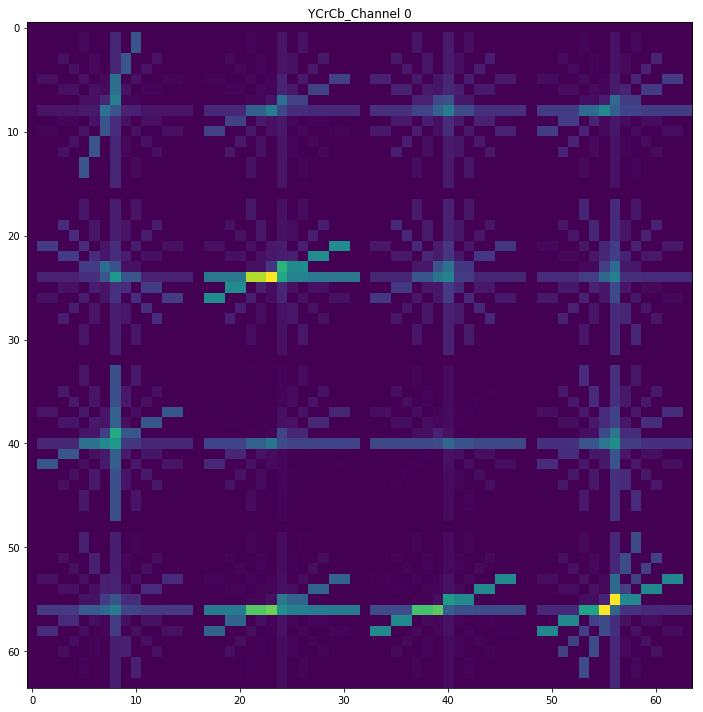

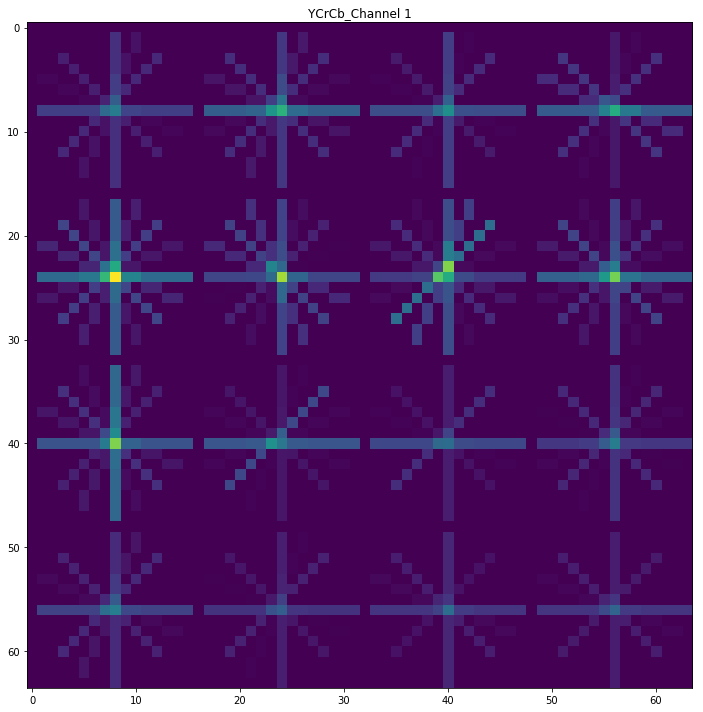

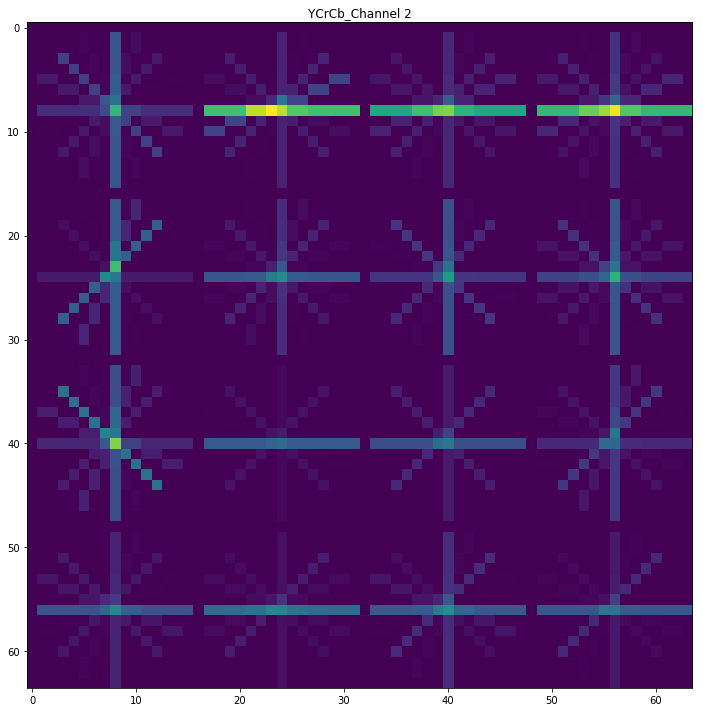

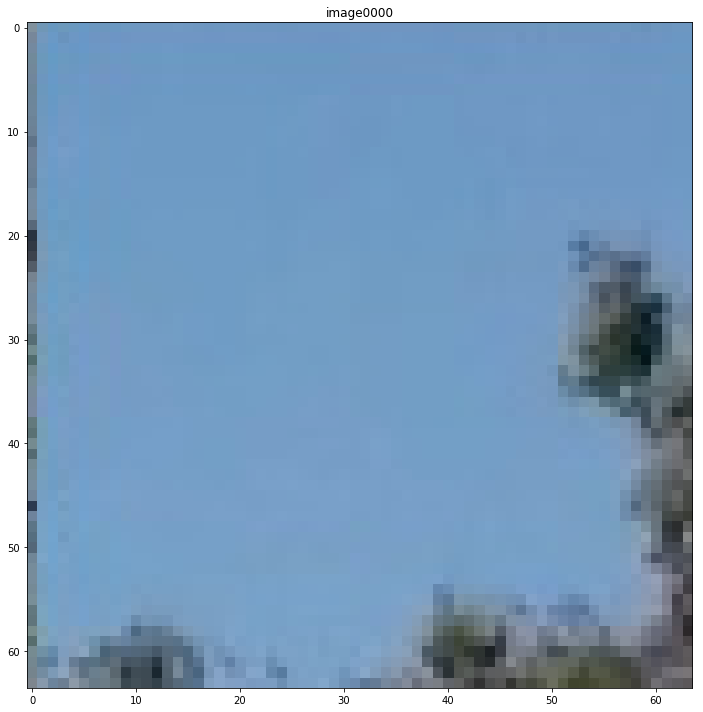

[[[[[  9.67002458e-02   6.78556953e-02   6.63723880e-02   2.46593403e-02
       5.25572935e-02   2.61642017e-02   4.31820710e-02   5.96982959e-02]
    [  3.89219264e-02   1.31016015e-02   1.81647109e-02   2.30779412e-02
       9.67002458e-02   6.99208823e-03   1.77077878e-02   2.88772083e-03]]

   [[  9.67002458e-02   8.08291808e-02   4.26984294e-02   4.67243062e-03
       4.90214931e-02   8.64142416e-02   6.67488076e-02   9.67002458e-02]
    [  4.75472986e-02   5.10481735e-03   2.57472482e-02   0.00000000e+00
       2.51123811e-02   5.10481735e-03   2.07067414e-02   1.44386041e-03]]]


  [[[  2.29491547e-01   7.72496909e-02   1.07102808e-01   1.36072207e-01
       2.34808471e-01   4.12267657e-02   1.04408696e-01   1.70265858e-02]
    [  1.38172863e-01   3.00990351e-02   9.86297220e-02   1.97720389e-01
       2.34808471e-01   9.90631649e-02   1.34597242e-01   1.10999755e-02]]

   [[  2.34808471e-01   3.00990351e-02   1.51810980e-01   0.00000000e+00
       1.48067676e-01   3.00990351e-0

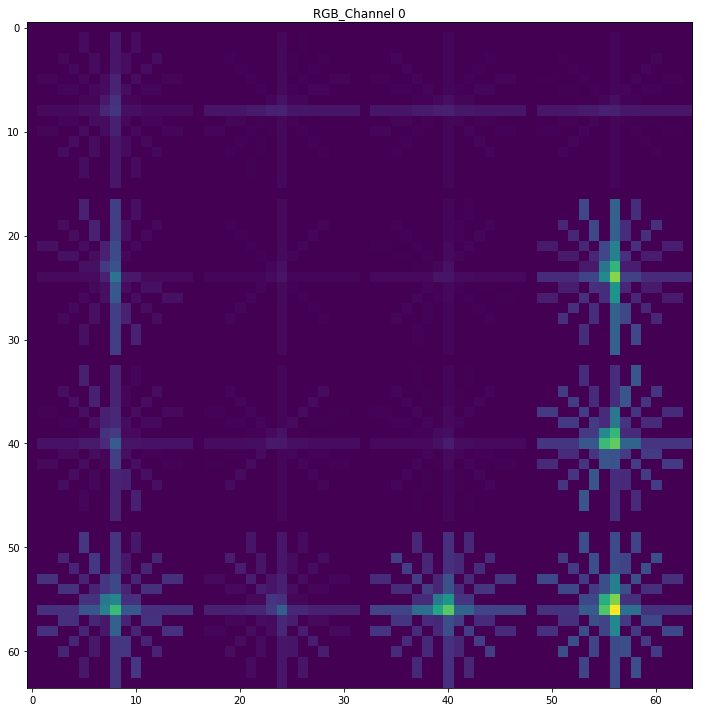

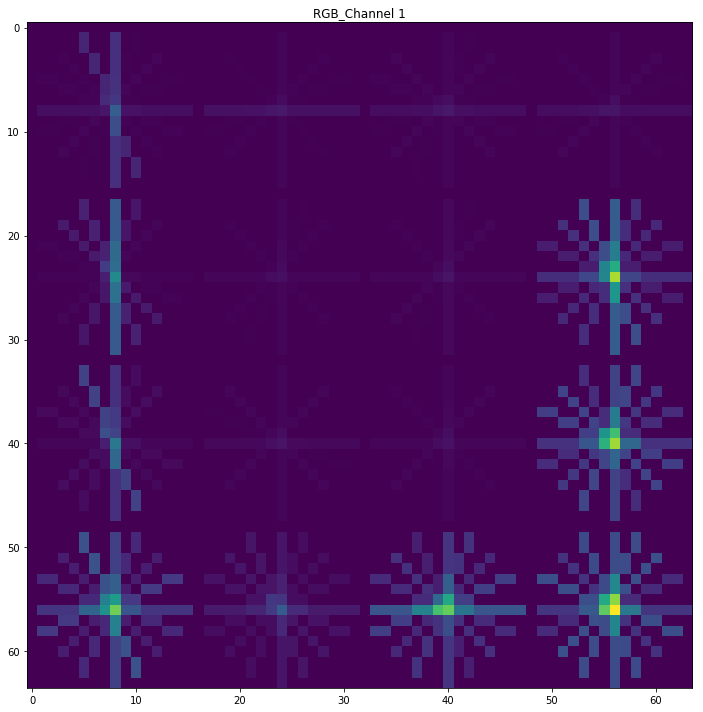

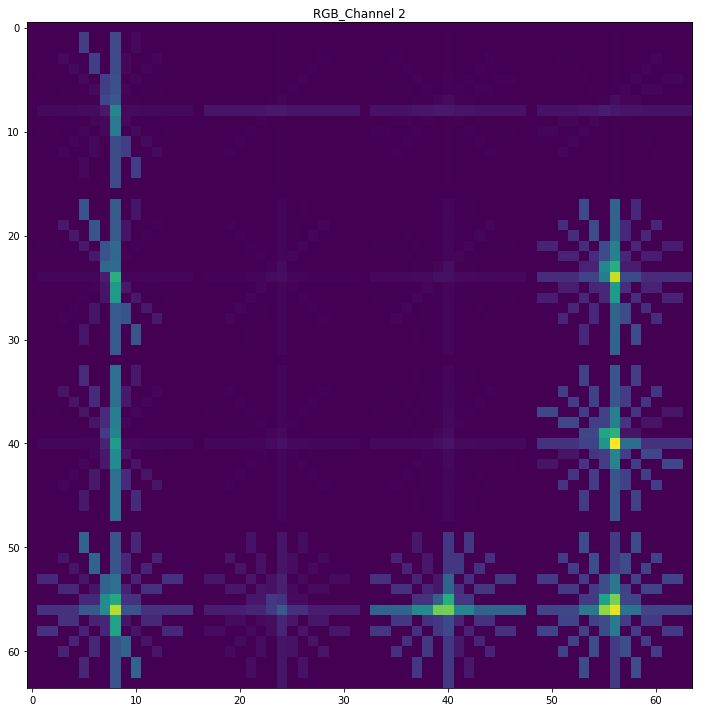

[[[[[  4.18242370e-01   7.63960847e-02   4.18242370e-01   1.59670754e-01
       4.18242370e-01   1.64489400e-01   2.31466521e-01   0.00000000e+00]
    [  4.18242370e-01   1.90990212e-02   1.20792798e-01   8.92370390e-02
       4.18242370e-01   3.81980424e-02   1.27812539e-01   0.00000000e+00]]

   [[  4.18242370e-01   1.23398219e-01   2.00288216e-01   0.00000000e+00
       2.56240254e-01   4.98952647e-02   4.18242370e-01   4.03326765e-01]
    [  1.62285494e-01   0.00000000e+00   9.66342416e-02   0.00000000e+00
       1.11037443e-01   1.90990212e-02   1.03653983e-01   0.00000000e+00]]]


  [[[  5.88189418e-01   3.77736950e-02   2.38901788e-01   1.76491385e-01
       5.88189418e-01   7.55473900e-02   2.52785303e-01   0.00000000e+00]
    [  4.39215653e-01   1.13321081e-01   3.00565671e-01   5.34200717e-02
       5.88189418e-01   3.77736950e-02   4.23893372e-01   0.00000000e+00]]

   [[  3.20965285e-01   0.00000000e+00   1.91121437e-01   0.00000000e+00
       2.19607826e-01   3.77736950e-0

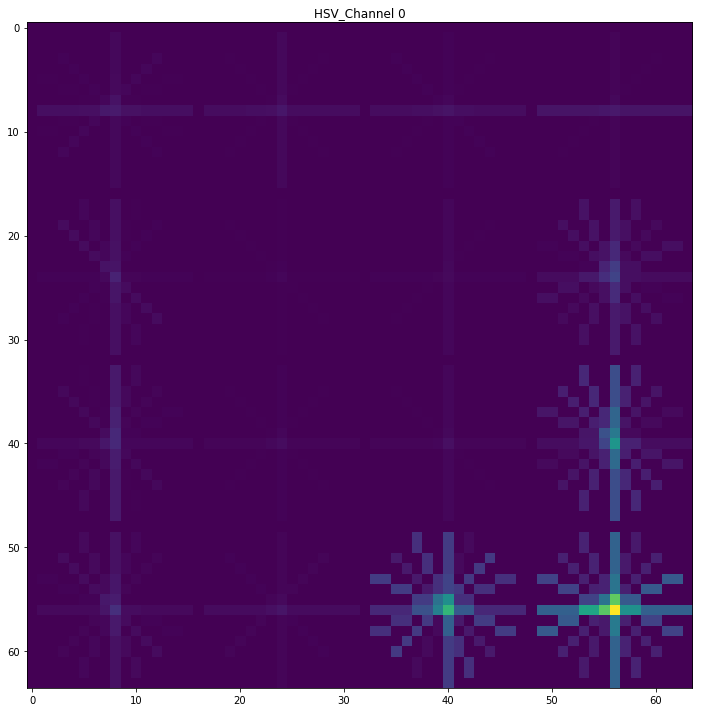

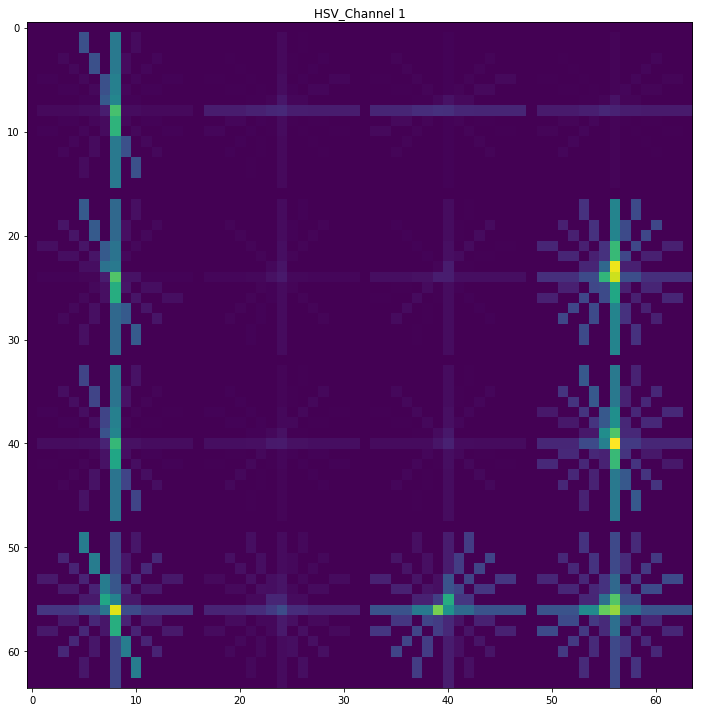

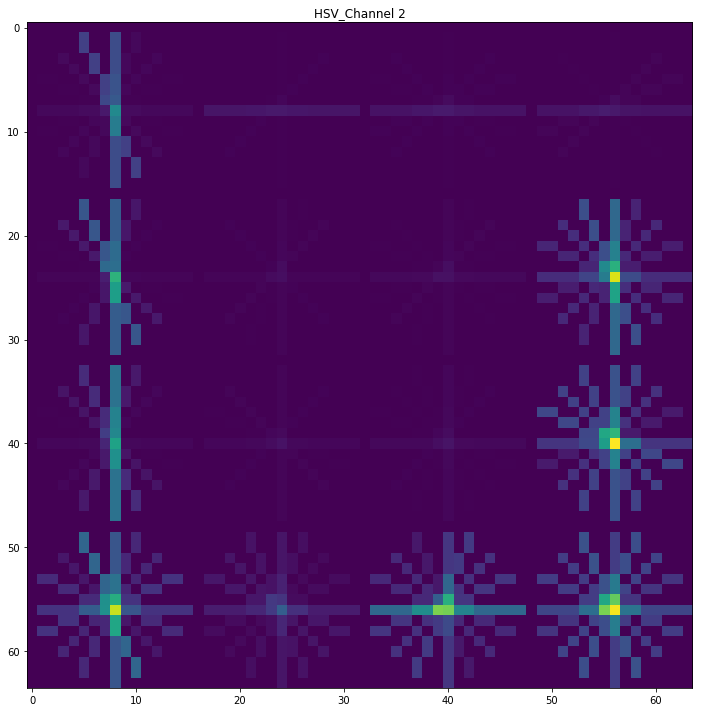

[[[[[  4.11768310e-01   7.40492880e-02   4.11768310e-01   1.88900881e-01
       4.11768310e-01   1.59436481e-01   2.66284892e-01   0.00000000e+00]
    [  4.11768310e-01   3.70246440e-02   1.35594515e-01   8.64957834e-02
       4.11768310e-01   5.55369640e-02   7.70534214e-02   0.00000000e+00]]

   [[  4.11768310e-01   1.19607573e-01   2.12647928e-01   0.00000000e+00
       2.64926783e-01   4.83625416e-02   4.11768310e-01   3.82836111e-01]
    [  1.57300277e-01   0.00000000e+00   9.36657528e-02   0.00000000e+00
       1.07626505e-01   1.85123220e-02   1.00469856e-01   0.00000000e+00]]]


  [[[  5.82811317e-01   7.41721732e-02   2.71639070e-01   1.73278647e-01
       5.82811317e-01   1.11258256e-01   1.54362584e-01   0.00000000e+00]
    [  4.31220449e-01   1.11258256e-01   2.95094364e-01   5.24476465e-02
       5.82811317e-01   3.70860866e-02   4.16177085e-01   0.00000000e+00]]

   [[  3.15122636e-01   0.00000000e+00   1.87642383e-01   0.00000000e+00
       2.15610225e-01   3.70860866e-0

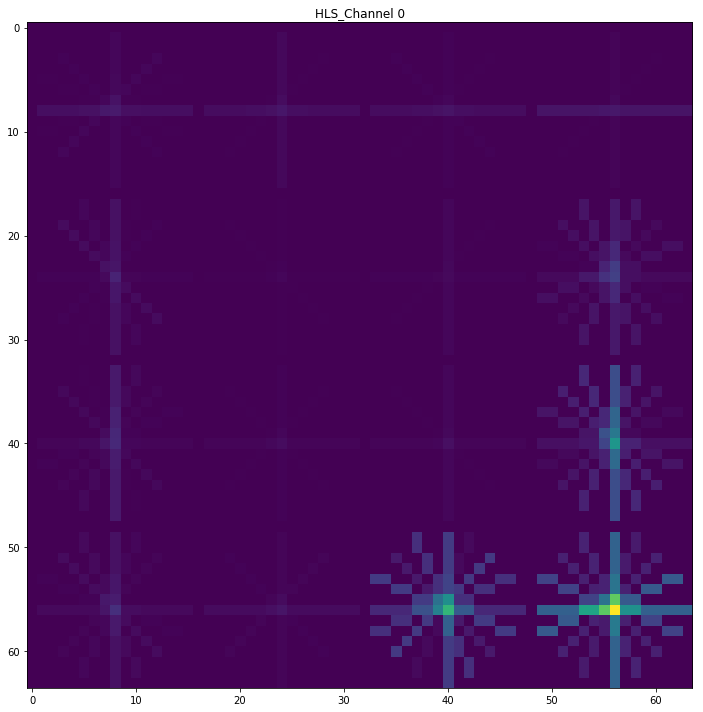

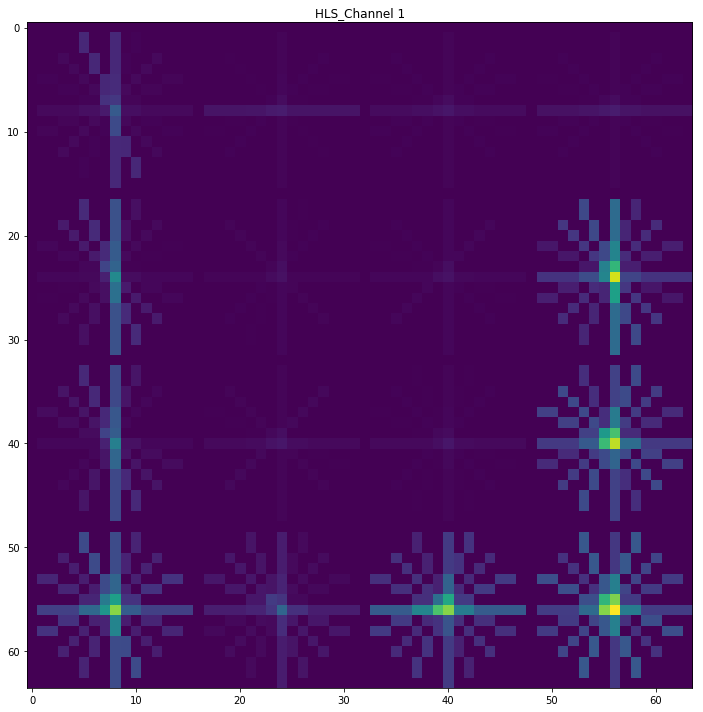

In [ ]:
CarImageIndex = 0
#CarImageIndex = randint(0, len(CarImageSet))
HOGCarImage = [CarImageSet[CarImageIndex][imgPxlVal]]
HOGCarImageLabel = [CarImageSet[CarImageIndex][img_Label]]

pltImages(HOGCarImage, HOGCarImageLabel, 1, 1)
ExploreHOGSpace(HOGCarImage[0])

NonCarImageIndex = 0
#NonCarImageIndex = randint(0, len(NonCarImageSet))
HOGNonCarImage = [NonCarImageSet[NonCarImageIndex][imgPxlVal]]
HOGCarImageLabel = [CarImageSet[CarImageIndex][img_Label]]

pltImages(HOGNonCarImage, HOGCarImageLabel, 1, 1)
ExploreHOGSpace(HOGNonCarImage[0])

# Enough Visualization :D, Let's Extract Some Features

In [ ]:
Color_Histogram_Feature_Active = False
Spatial_Binning_Fetarue_Active = False
HOG_Featur_eActive = False

In [ ]:
#Color Histogram
histSize = [48]
histrange = [0,255]

ColorSpace = ['RGB','HSV','HLS', 'LAB', 'YUV', 'LUV', 'YCrCb']

#Spatial Binning
size=(32, 32)

#HOG Params
orient = 8
pix_per_cell = 16
cells_per_block = 2

blockNorm = ['L1', 'L1-sqrt', 'L2', 'L2-Hys']

hc = 'ALL'   

In [ ]:
def extractFeatures(img):
    